DecisionTree has a score of 0.9350
RandomForest with 10 estimators has a score of 0.9950


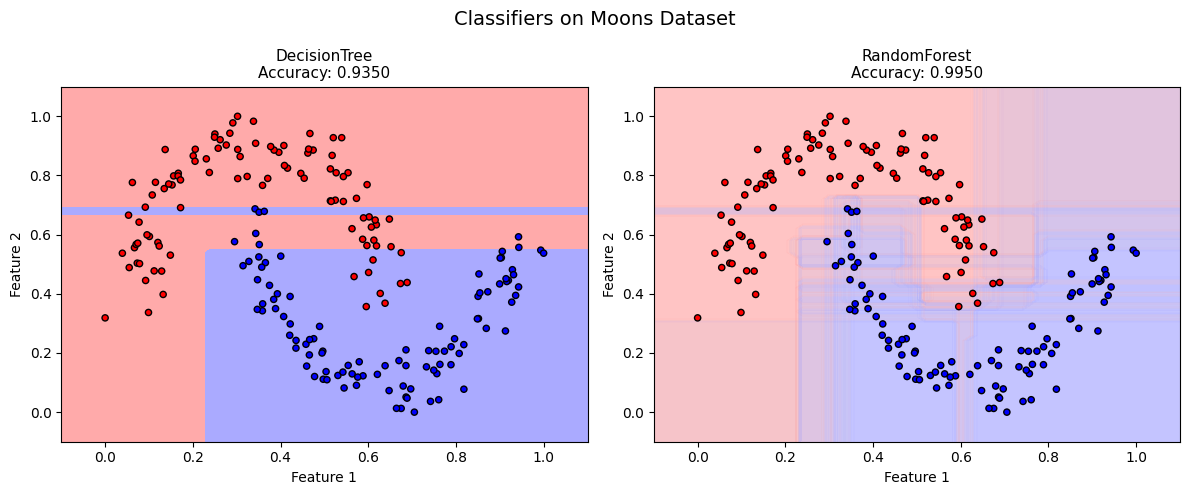

In [11]:
from sklearn.datasets import make_moons
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generate the data
n_samples = 200
noise = 0.1
X_moons, y_moons = make_moons(n_samples=n_samples, noise=noise)

# Scale it to a range
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X_moons)
y = y_moons

# Parameters
n_classes = 2  # Ahora solo 2 clases (las dos lunas)
n_estimators = 10  # number of trees in the forest
plot_step = 0.02
RANDOM_SEED = 42

models = [
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(n_estimators=n_estimators, random_state=RANDOM_SEED)
]

# Colormap para 2 clases
cmap = ListedColormap(['#FFAAAA', '#AAAAFF'])

plt.figure(figsize=(12, 5))

for idx, model in enumerate(models):
    # Shuffle
    indices = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    # Train
    model.fit(X_shuffled, y_shuffled)
    score = model.score(X_shuffled, y_shuffled)
    
    # Model title
    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
    model_details = model_title
    if hasattr(model, "estimators_"):
        model_details += f" with {len(model.estimators_)} estimators"
    
    print(f"{model_details} has a score of {score:.4f}")
    
    # Plot
    plt.subplot(1, 2, idx + 1)
    plt.title(f"{model_title}\nAccuracy: {score:.4f}", fontsize=11)
    
    # Create mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )
    
    # Plot decision boundary
    if isinstance(model, DecisionTreeClassifier):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z,  cmap=cmap)
    else:
        # Alpha blend for Random Forest
        estimator_alpha = 1.0 / len(model.estimators_)
        for tree in model.estimators_:
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha = estimator_alpha, cmap=cmap)
    
    # Plot training points
    plt.scatter(
        X_shuffled[:, 0],
        X_shuffled[:, 1],
        c=y_shuffled,
        cmap=ListedColormap(["r", "y", "b"]),
        edgecolor="k",
        s=20,
        )
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.suptitle("Classifiers on Moons Dataset", fontsize=14)
plt.tight_layout()
plt.show()